In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
Tickers = pd.read_csv("Nikkei-2010-2012.csv"); Tickers

,Ticker,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2012-12-14,2012-12-17,2012-12-18,2012-12-19,2012-12-20,2012-12-21,2012-12-25,2012-12-26,2012-12-27,2012-12-28
0,4151.t,999.0,989.0,1003.0,984.0,991.0,984.0,985.0,990.0,989.0,...,845.0,848.0,852.0,861.0,850.0,852.0,856.0,850.0,851.0,849.0
1,4502.t,3850.0,3870.0,3870.0,3930.0,3900.0,3940.0,3930.0,3970.0,3970.0,...,3805.0,3835.0,3845.0,3870.0,3875.0,3865.0,3865.0,3865.0,3860.0,3855.0
2,4503.t,694.0,700.0,700.0,700.0,702.0,700.0,696.0,704.0,702.0,...,797.0,800.0,809.0,812.0,802.0,792.0,797.0,798.0,780.0,775.0
3,4506.t,979.0,984.0,991.0,982.0,981.0,977.0,979.0,982.0,980.0,...,999.0,1013.0,1019.0,1026.0,1012.0,1010.0,1021.0,1032.0,1033.0,1035.0
4,4507.t,2003.0,2007.0,2007.0,1957.0,1930.0,1931.0,1904.0,1968.0,1957.0,...,1349.0,1382.0,1443.0,1462.0,1461.0,1457.0,1454.0,1469.0,1479.0,1437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,9501.t,2355.0,2375.0,2375.0,2424.0,2441.0,2445.0,2440.0,2484.0,2470.0,...,152.0,202.0,237.0,230.0,233.0,224.0,229.0,228.0,220.0,206.0
207,9502.t,2250.0,2259.0,2259.0,2273.0,2275.0,2286.0,2295.0,2308.0,2310.0,...,1084.0,1188.0,1147.0,1159.0,1157.0,1158.0,1177.0,1169.0,1162.0,1150.0
208,9503.t,2119.0,2123.0,2123.0,2121.0,2131.0,2137.0,2130.0,2139.0,2128.0,...,782.0,920.0,879.0,904.0,922.0,956.0,977.0,967.0,952.0,907.0
209,9531.t,1865.0,1880.0,1870.0,1885.0,1875.0,1875.0,1880.0,1870.0,1870.0,...,2015.0,2040.0,2030.0,2035.0,2045.0,2045.0,2030.0,2025.0,2010.0,1975.0


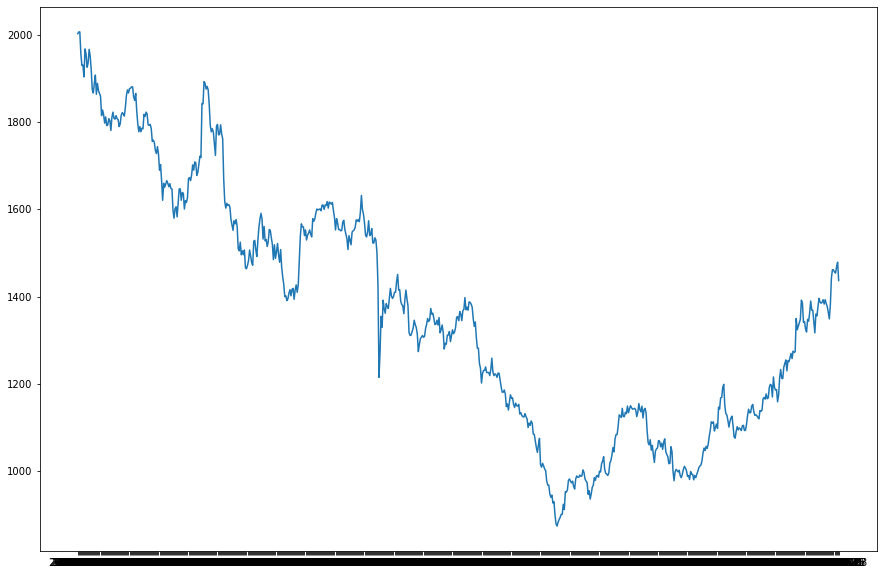

In [14]:
plt.plot(Tickers.iloc[4,1:], label='Stock price')

Now we'll take the returns in order to have stationarity.

In [5]:
Ticks = Tickers.iloc[4,1:]
returns = np.zeros(734)
for r in range(0,733):
    returns[r] = (Ticks.iloc[r+1] - Ticks.iloc[r]) / Ticks.iloc[r+1]
rets = pd.Series(returns); rets #Convert to pandas.core.series.Series

0      0.001993
1      0.000000
2     -0.025549
3     -0.013990
4      0.000518
         ...   
729   -0.000684
730   -0.002745
731   -0.002063
732    0.010211
733    0.000000
Length: 734, dtype: float64

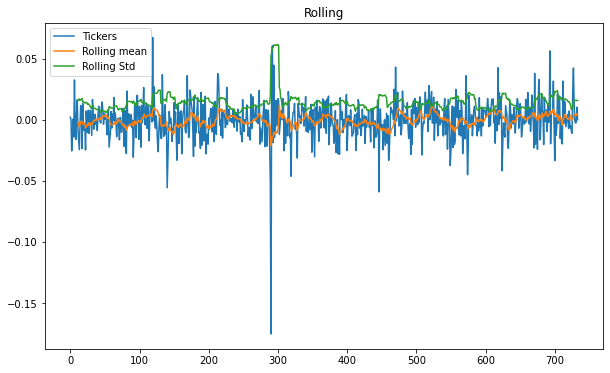

In [6]:
rolling_mean = rets.rolling(window=12).mean()
rolling_std = rets.rolling(window=12).std()
plt.plot(rets, label="Tickers")
plt.title("Rolling")
plt.plot(rolling_mean, label="Rolling mean")
plt.plot(rolling_std, label="Rolling Std")
plt.legend(loc="best")
plt.show()

Based on the plot, there seems to be stationarity. Now let's use the adfuller test.

In [5]:
rslt = adfuller(rets)
print("ADF Statistic: {}".format(rslt[0]))
print("p-value: {}".format(rslt[1]))
print("Critical values:")
for key, value in rslt[4].items():
    print("\t{}: {}".format(key, value))

ADF Statistic: -14.652872203140918
p-value: 3.478027977539596e-27
Critical values:
	1%: -3.4393396487377155
	5%: -2.865507363200066
	10%: -2.5688826684180897


In [6]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(rets)

(0.01, False)

From plot and ADF tests we can say there is stationarity.

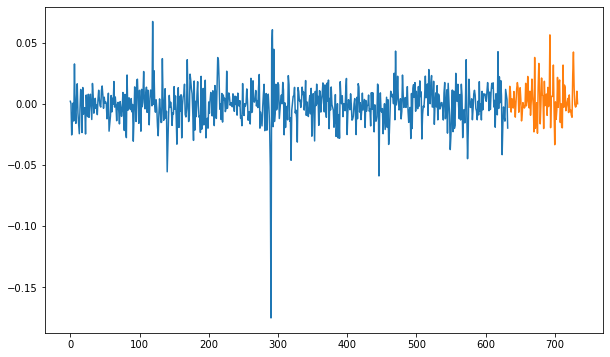

In [7]:
train_sec = rets.iloc[:633]
test_sec = rets.iloc[634:]
plt.plot(train_sec)
plt.plot(test_sec)

In [8]:
arima_model = auto_arima(train_sec, star_p=0, d=1, star_q=0,
                         max_p=5, max_d=5, max_q=5,
                         start_P=0, start_Q=0,
                         max_P=5, max_D=5, max_Q=5,
                         arror_action="warn", trace=True,
                         supress_warning=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3006.997, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3150.031, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3008.996, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3257.629, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3274.971, Time=0.69 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3309.861, Time=0.69 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-3340.668, Time=0.54 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-3377.868, Time=4.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3405.279, Time=5.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3410.503, Time=3.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3406.543, Time=2.66 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   :

In [9]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  633
Model:               SARIMAX(4, 1, 2)   Log Likelihood                1713.252
Date:                Tue, 21 Jun 2022   AIC                          -3410.503
Time:                        13:44:40   BIC                          -3374.912
Sample:                             0   HQIC                         -3396.681
                                - 633                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.526e-06   2.67e-05     -0.095      0.924   -5.48e-05    4.97e-05
ar.L1         -0.8021      0.215     -3.729      0.000      -1.224      -0.381
ar.L2         -0.0446      0.039     -1.140      0.254      -0.121       0.032
ar.L3          0.0619      0.048      1.295      0.195      -0.032       0.156
ar.L4          0.0480      0.064      0.751      0.453      -0.077       0.173
ma.L1         -0.1615      0.212     -0.763      0.446      -0.577       0.254
ma.L2         -0.8044      0.210     -3.823      0.000      -1.217      -0.392
sigma2         0.0003   5.25e-06     48.807      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             13237.23
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -1.94
Prob(H) (two-sided):                  0.88   Kurtosis:                        25.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we will use the trained model to forecast data and compare with the test set.

In [10]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 100), index=test_sec.index)
prediction.columns = ['predicted_returns']
prediction

,predicted_returns
634,0.000025
635,0.002113
636,-0.002084
637,0.001301
638,-0.000142
...,...
729,0.000257
730,0.000255
731,0.000254
732,0.000252


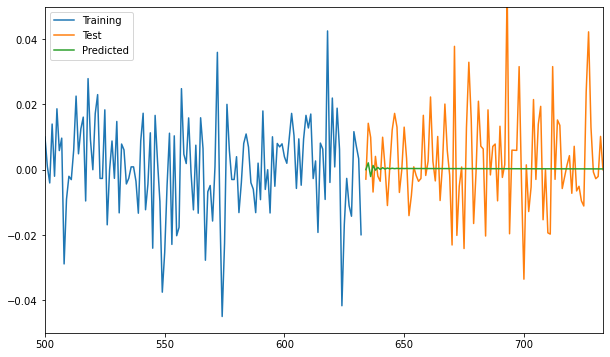

In [11]:
plt.ylim(-0.05, 0.05)
plt.xlim(500, 733)
plt.plot(train_sec, label="Training")
plt.plot(test_sec, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc="best")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

The forecasting is not ideal but is does capture some of the possible stationarity the plot shows. Since some of the peaks of the predicted data do match with the peaks of the test data.